# **TP Wavelets**

In this TP, we will work on some fundamental concepts in Wavelets and compression of images.

First we'll briefly check the limitations of the Fourier transform. We'll then check some fundamental properties of a family of Wavelets and compute the Wavelet transform of a very simple signal. In the second part of the TP, we will use the DWT to compress and image.

Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

**Note 1:** As mentioned in the course and since there's not any policy regarding ChatGPT at Télécom level yet, you can use it. However, using ChatGPT without understanding their outputs is not OK, and will be penalized accordingly in your grade. Please be sure of all the functions you'll use.

**Note 2:** Several points have associated questions. When answering these questions, all responses should be properly justified. ChatGPT answers are very easy to spot.

**Note 3:** Always plot the functions and outputs you're generating. If the output or function is not properly plotted/shown, this will reduce points in your grade.

# Setup
First, we install PyWavelets

In [1]:
!pip install PyWavelets


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pywt

pywt.__version__

'1.7.0'

# Important
Google Colab is an interesting tool to try things out quickly. However, Google Colab and more general Notebooks are not meant to be an Integrated Development Environment (IDE). For a real job, please use an actual IDE like PyCharm or VS Code.

# Limitation of the Fourier Transform
*   Create a sinusoidal signal of 2.5 seconds of duration.
*   Set up a sampling rate of 20kHz. The signal should be divided in 5 parts of 0.5 seconds of duration each.
*  The signal should have the following frequencies in this order {10 Hz, 30 Hz, 60 Hz, 30 Hz, 10 Hz}.

In [3]:
# Your code here
import numpy as np

duree = 2.5 
freq0 = 20000 
nbr_ech = int(duree  * freq0)  

frequences = [10, 30, 60, 30, 10]  

# temps
time = np.linspace(0, duree , nbr_ech, endpoint=False)

# signal
signal = np.zeros(nbr_ech)
for i in range(5):
    signal[int(0.5*freq0)*i:int(0.5*freq0)*(i+1)]= np.sin(2 * np.pi * frequences[i] * time[int(0.5*freq0)*i:int(0.5*freq0)*(i+1)]) 



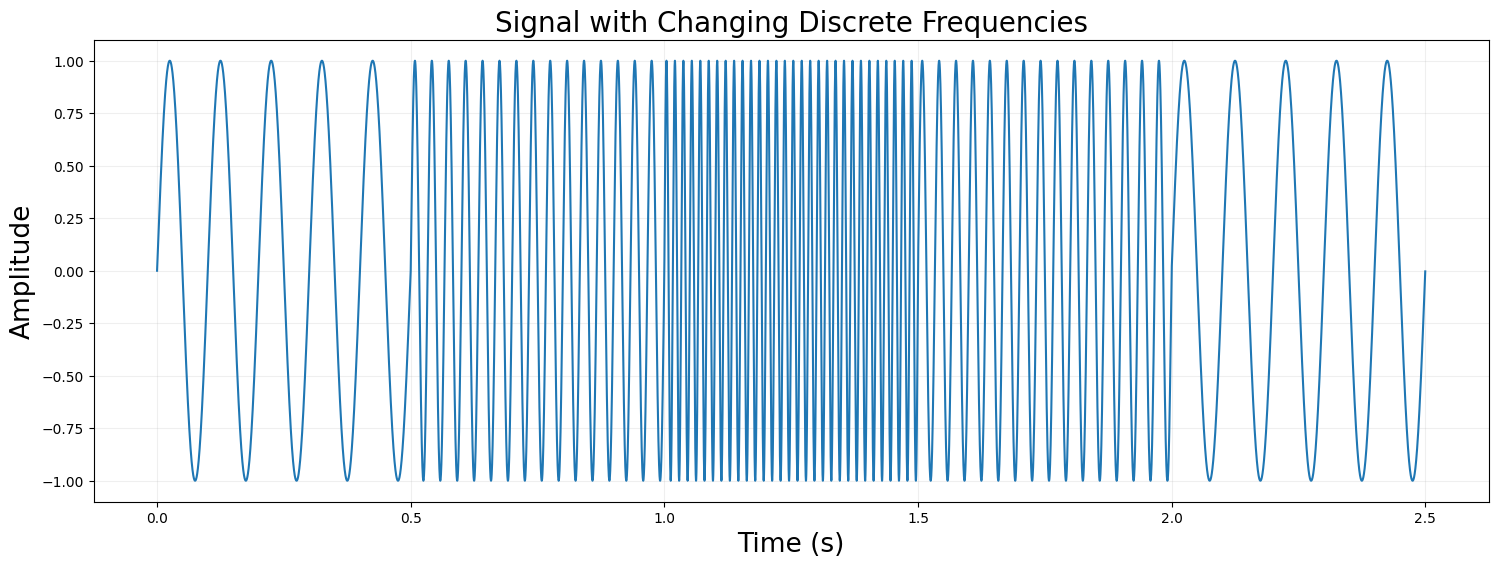

In [4]:
import matplotlib
import matplotlib.pyplot as plt

font_size = 20

plt.figure(figsize=(18, 6))

plt.plot(time, signal, linewidth=1.5)
plt.title('Signal with Changing Discrete Frequencies', fontsize=font_size)
plt.xlabel('Time (s)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.grid(alpha=0.2)

Now, you should compute the Discrete Fourier Transform of the signal. You can use any library from Python you prefer. You might need to cut the x-axis in the Fourier transform up to 100 Hz in the visualization. Please check https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html and https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

C:\Users\alexa\AppData\Local\Temp\ipykernel_24464\1489527690.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


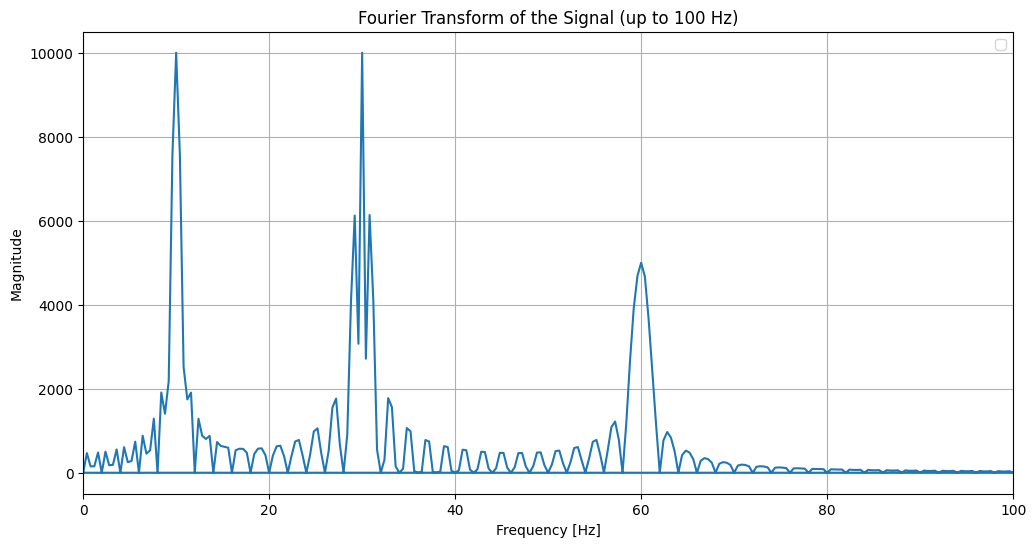

In [5]:

# Transformée de Fourier discrète (DFT) 
signal_dft = np.fft.fft(signal)
# fréquences associées à la DFT
freq_dft = np.fft.fftfreq(nbr_ech, 1 / freq0)



# Afficher la magnitude de la Transformée de Fourier
plt.figure(figsize=(12, 6))
plt.plot(freq_dft,abs(signal_dft))
plt.xlim(0,100)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of the Signal (up to 100 Hz)")
plt.grid(True)
plt.legend()
plt.show()

**QUESTIONS**

1) Does the established sampling rate satisfy the Nyquist-Shannon sampling theorem to avoid aliasing? Please justify.

2) What can you say from the signal looking **only** at the Fourier transform?

3) Can you be certain about the location of some frequency component in the time domain? Why?

**YOUR ANSWERS HERE:**

1) The highest freauency of the signal is 60Hz which is way lower than the half of the sampling rate (20kHz/2), so the Nyquist-Shannon sampling theorem to avoid aliasing is satisfied here.

2) We observe peaks at the frequencies 10 Hz, 30 Hz, and 60 Hz. The Fourier transform shows the strength of these frequencies in the signal. 2 peaks are stronger than the other therefore 2 patterns will repeat.

3) No, we have no precise information about the location of theses frequencies components in the time domain without other transformation because Fourier transform only give information in the frequency domain not related to the time domain.

# **Mother Wavelet**
As we saw in the course, a wavelet is not just a function but a whole family of functions that satisfy certain requirements. In this part of the TP we're gonna work with the Morlet wavelet defined as follows: $\Psi(t)=k e^{iw_0t}e^{-\frac{1}{2}(\frac{t}{\sigma})^2}$. Please generate a Morlet wavelet in Python **WITHOUT using PyWavelets** with the following parameters:

-Center frequency of the wavelet = 10 Hz

-Sampling rate $\eta$ = 20000 Hz

-$k=\frac{1}{\sqrt{\eta}}$

-$\sigma = 0.1$

You can generate the wavelet between -1 and 1 seconds, so the time duration of the wavelet is 2 seconds. For this part, you just need to generate the real part of the wavelet.

Text(0, 0.5, 'Amplitude')

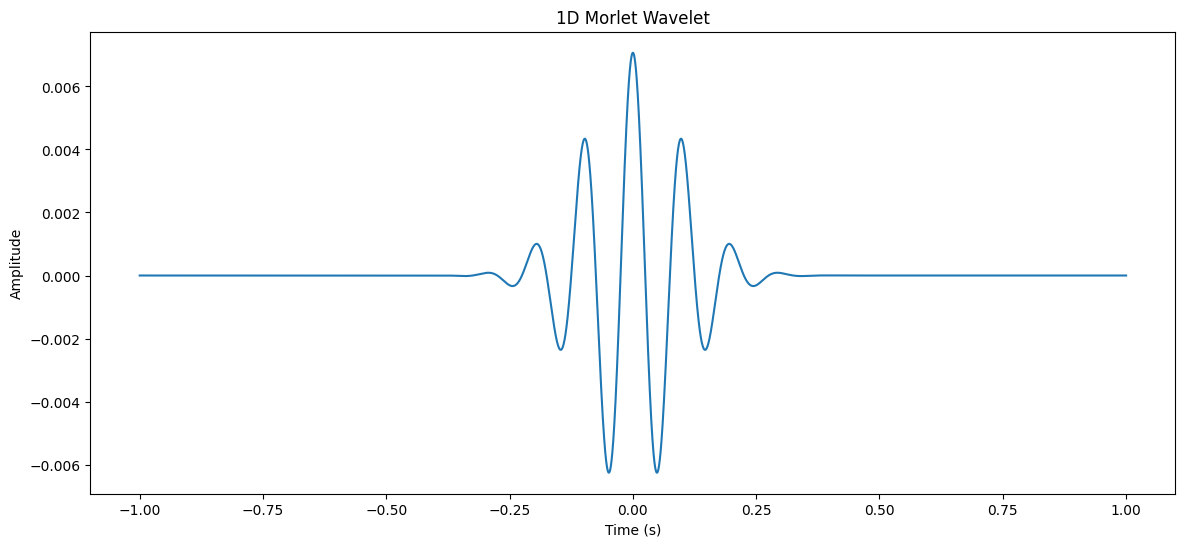

In [6]:
# Your code here
freq0 = 20000
nbr_ech=freq0*2
k= 1/np.sqrt(freq0)
sig=0.1
w0=2*np.pi*10

time=np.linspace(-1,1,nbr_ech)

morlet_wave=[]
for t in time:
    morlet_wave.append(k*np.exp(1j*w0*t)*np.exp(-1/2 * (t/sig)**2)) 
morlet_wave_real=[]
for e in morlet_wave:
    morlet_wave_real.append(e.real)

# Plot the real part of the Morlet wavelet in 1D
plt.figure(figsize=(14, 6))

plt.plot(time,morlet_wave_real)
plt.title('1D Morlet Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Please show that the mother wavelet we just created satisfies the admissibility and the finite energy conditions:

In [7]:
# Your code here
import numpy as np

# Intégration avec la méthode des trapèzes
integrale_wave = np.trapezoid(morlet_wave)
if abs(integrale_wave)<0.000001:
    print('the admissibility condition is satisfied')
else:
    print('the admissibility condition is not satisfied')
wave2=[]
for e in morlet_wave:
    wave2.append(abs(e)**2)
integrale_wave2= np.trapezoid(wave2)
if integrale_wave2<10000:
    print('the finite energy condition is satisfied')
else:
     print('the finite energy condition is not satisfied')



the admissibility condition is satisfied
the finite energy condition is satisfied


**Note:** In real life, you have to deal with finite-precision related problems. Therefore, if for the admissibility condition you don't have exactly the value you were expecting for, don't worry.

# **Convolution**

As we saw in the course, we need a measure of similarity to compute the wavelet transform. We also saw that we can easily compute the shift in time and similarity calculation with the 1-D convolutions.

* Generate a chirp sinusoidal signal from -5 to 5 seconds with an initial frequency of 5 Hz and final frequency of 15 Hz and sampling rate of 20kHz:

Text(0.5, 0, 'Time')

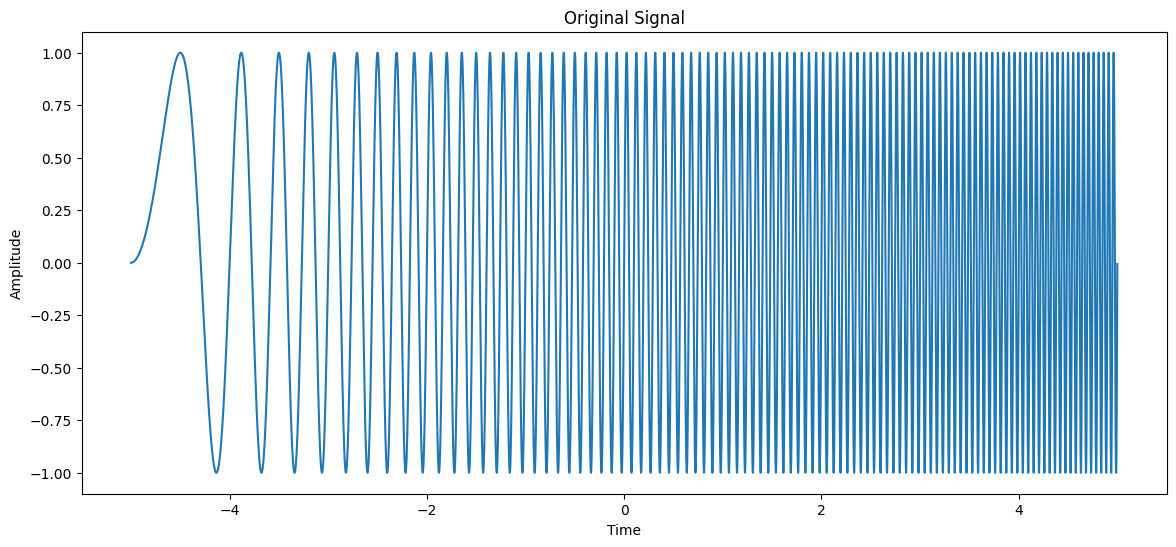

In [8]:
# Your code here
freq0=20000
time_signal=np.arange(-5,5,1/freq0)

signal=[]
for t in range(len(time_signal)):
    signal.append(np.sin(2*np.pi*time_signal[t]*(5+((15-5)*t/(len(time_signal))))))




plt.figure(figsize=(14, 6))
plt.plot(time_signal, signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Now create a Morlet wavelet with the following parameters:

* Center frequency of the wavelet = 10 Hz

* Sampling rate $\eta$ = 20000 Hz

* $k=\frac{1}{\sqrt{\eta}}$
* $\sigma = 0.2$
* Duration = 2 seconds


Text(0.5, 0, 'Time')

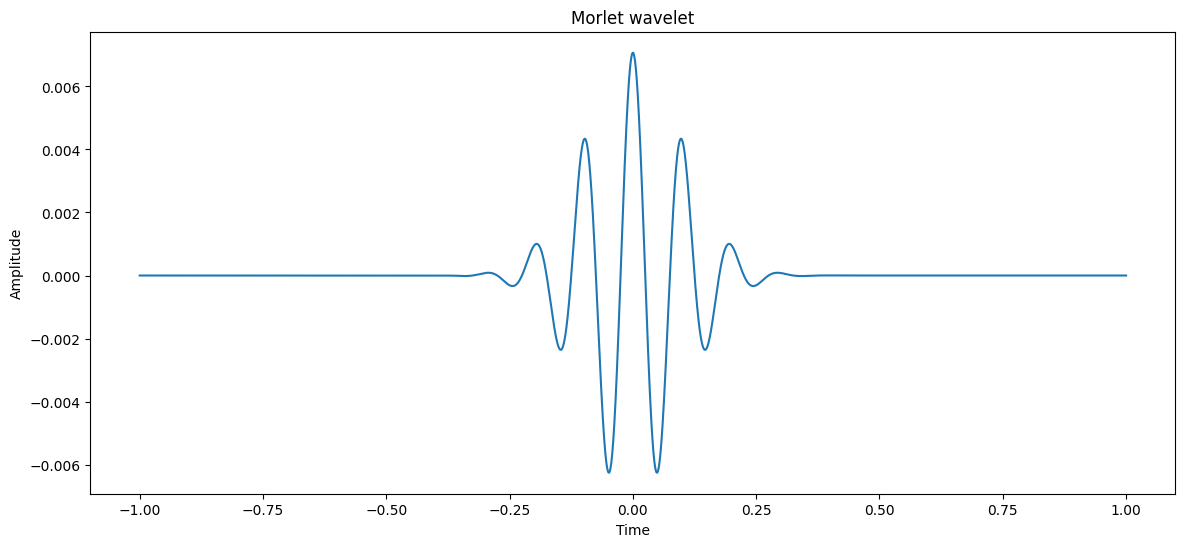

In [9]:
# Your code here

#même question qu'avant
freq0 = 20000
nbr_ech=freq0*2
k= 1/np.sqrt(freq0)
sig=0.1
w0=2*np.pi*10

time=np.linspace(-1,1,nbr_ech)

morlet_wavelet=[]
for t in time:
    morlet_wavelet.append(k*np.exp(1j*w0*t)*np.exp(-1/2 * (t/sig)**2)) 

plt.figure(figsize=(14, 6))
plt.plot(time, np.real(morlet_wavelet))

plt.title('Morlet wavelet')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Compute the convolution between the signal and $Re(\Psi(t))$. For reference on how to perform convolution with scipy 'convolve' function, please check https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

Text(0, 0.5, 'Amplitude')

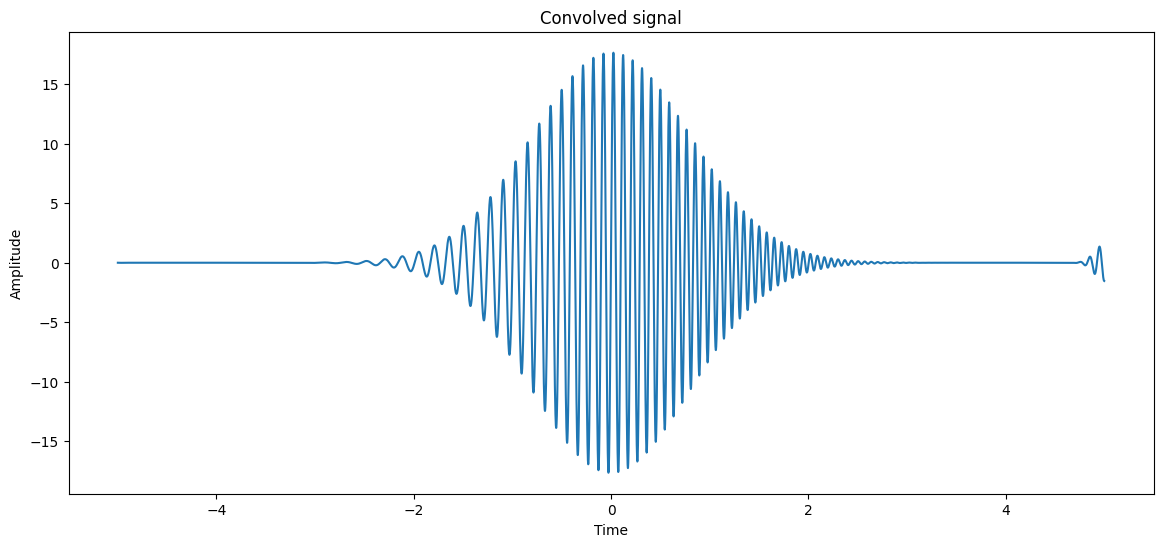

In [10]:
# Your code here
import scipy
morlet_wavelet_real=[]
for e in morlet_wavelet:
    morlet_wavelet_real.append(e.real)


convolved_signal= scipy.signal.convolve(signal,morlet_wavelet_real,mode='same')

plt.figure(figsize=(14, 6))
plt.plot(time_signal, convolved_signal)
plt.title('Convolved signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

There are some points where the convolution is zero, even in regions of high similarity between the wavelet and the signal. **Is this OK?** If it's not, propose a solution to that.

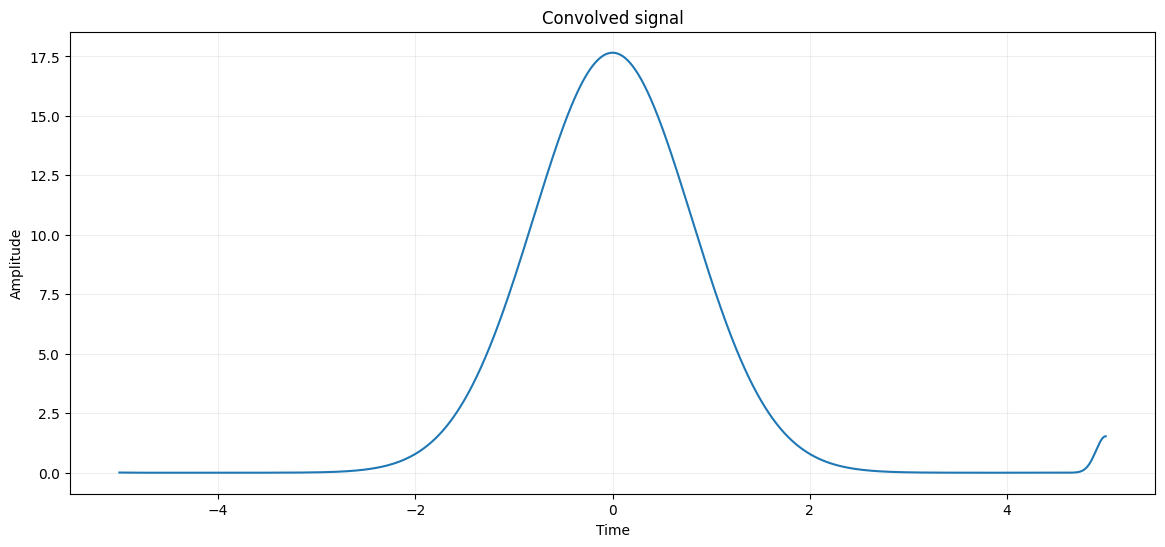

In [11]:
# Your code here
# it's normal due to the phase of the real wavelet(so we only have the shape of what we need) however it is not OK
# A solution would be to convolve with the complex morlet wavelet so we have everycomposent and then we take the absolute of the result

convolved_signal= scipy.signal.convolve(signal,morlet_wavelet,mode='same')

plt.figure(figsize=(14, 6))
plt.plot(time_signal, abs(convolved_signal))
plt.title('Convolved signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(alpha=0.2)
#we don't have 0 anymore so the solution works

# **Image Compression**
For this part, we'll use the Discrete Wavelet Transform (DWT) implemented as a filter bank to do image compression. The first step is to have an image to compress. For doing so you can use the following piece of code to download an image of Trudy.

In [12]:
!wget https://raw.githubusercontent.com/jhonygiraldo/jhonygiraldo.github.io/main/Trudy_for_compression.jpeg

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


**Visualize image:** With the following code you can visualize the image. If you're using Google Collab, most probably you already have the open cv library installed. If you're using Jupyter Notebook for example, you'll have to install open cv if it's not already installed.

In [13]:
# Let us define a function for visualizing images
def show_image(image, title='Input Image', font_size=12,fig_size = (10, 10)):
  #A function that uses matplotlib to show grayscale images
  plt.figure(figsize=fig_size)
  plt.imshow(image, cmap='gray')
  plt.title(title, fontsize=font_size)
  plt.axis('off')

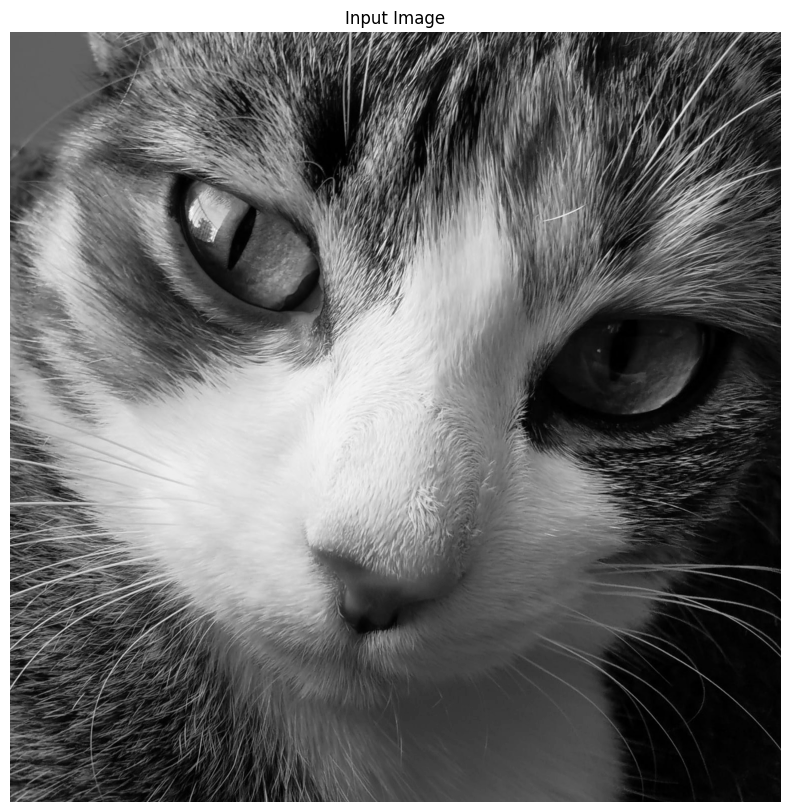

In [14]:
import cv2

# Load your image as a grayscale
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)
# Display the original image
show_image(input_image, 'Input Image')

If you use some wavelet function (Biorthogonal 1.3 in this case), the 1-level 2D wavelet decomposition of our input image is given as follows:

In [15]:
# # You can see a list of wavelet families
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [16]:
# For each family, you can list the available wavelets
pywt.wavelist(family='bior', kind='all')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8']

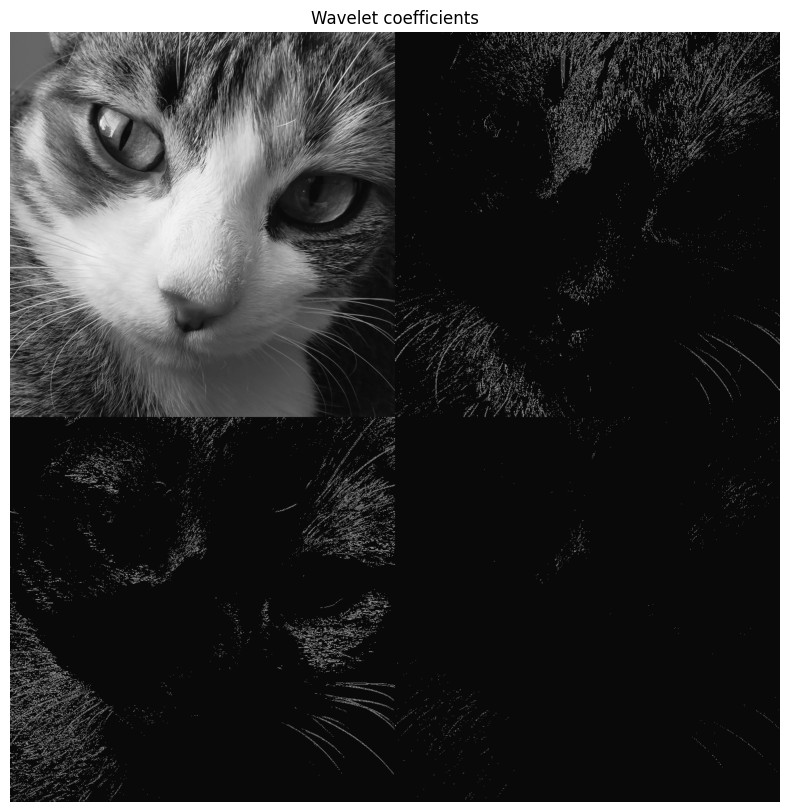

In the previous image we applied a threshold in the wavelet coefficients for visualization purposes. **Please explain the meaning of each of these 4 images**.

**YOUR ANSWER HERE:**

1) Top left : Approximation coefficients : low-pass filtered version of the original image

2) Top right : Horizontal detail coefficients : result of applying a wavelate that highlights horizontal details using a high-pass filter horizontally then using a treshold to keep only  significant coefficient.

3) Bottom left : Vertical detail coefficients : result of applying a wavelate that highlights vertical details using a high-pass filter vertically then using a treshold to keep only significant coefficient.

4) Bottom right : Diagonal detail coefficients : result of applying a wavelate that highlights diagonal details using a high-pass filter diagonally then using a treshold to keep only significant coefficient.


Now, you should compute the six-levels 2D wavelet decomposition of the input image with a Daubechies wavelet with six vanishing moments using the PyWavelet library. Please check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2

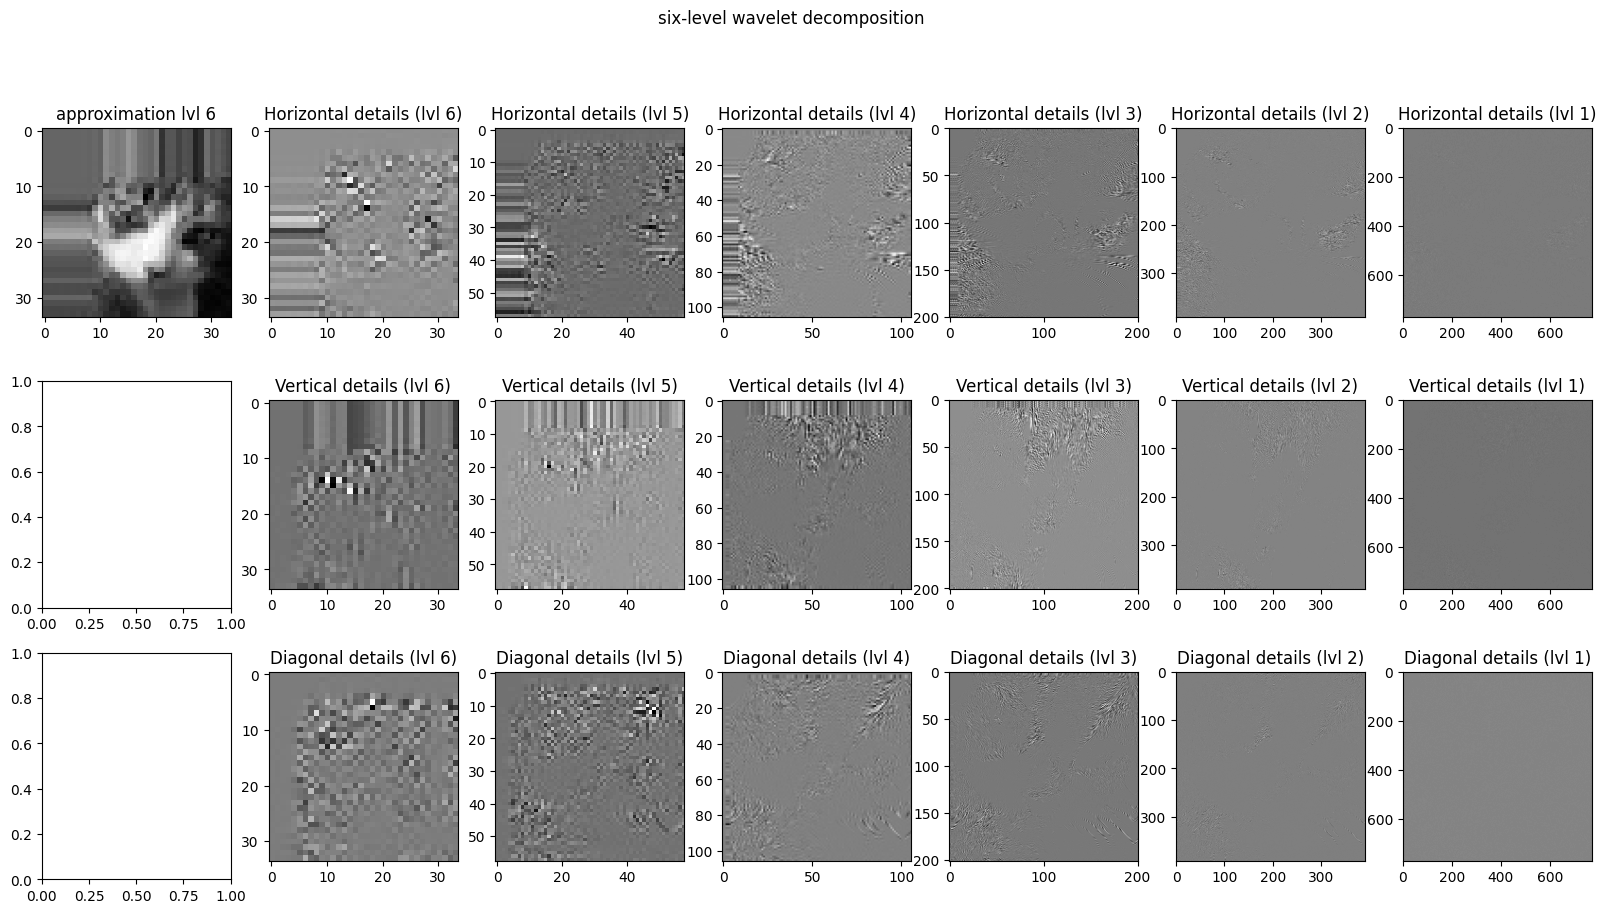

In [17]:
# Your code here
wavelet='db6'
coeffs=pywt.wavedec2(input_image,wavelet,level=6)

fig, axes = plt.subplots(3,7,figsize=(20,10))
fig.suptitle('six-level wavelet decomposition')

axes[0,0].imshow(coeffs[0],cmap='gray')
axes[0,0].set_title('approximation lvl 6')

for i in range(1,7):
    cH,cV,cD=coeffs[i]
    axes[0,i].imshow(cH, cmap='gray')
    axes[0,i].set_title(f'Horizontal details (lvl {7-i})')
    axes[1,i].imshow(cV, cmap='gray')
    axes[1,i].set_title(f'Vertical details (lvl {7-i})')
    axes[2,i].imshow(cD, cmap='gray')
    axes[2,i].set_title(f'Diagonal details (lvl {7-i})')


#I don't know how to make the correct diposition with that much levels
plt.show()

* Set a threshold of value of 100 and take to zero the values less than that in the 2D wavelet decomposition. **Note:** You should only threshold the outputs of the high-pass filters.



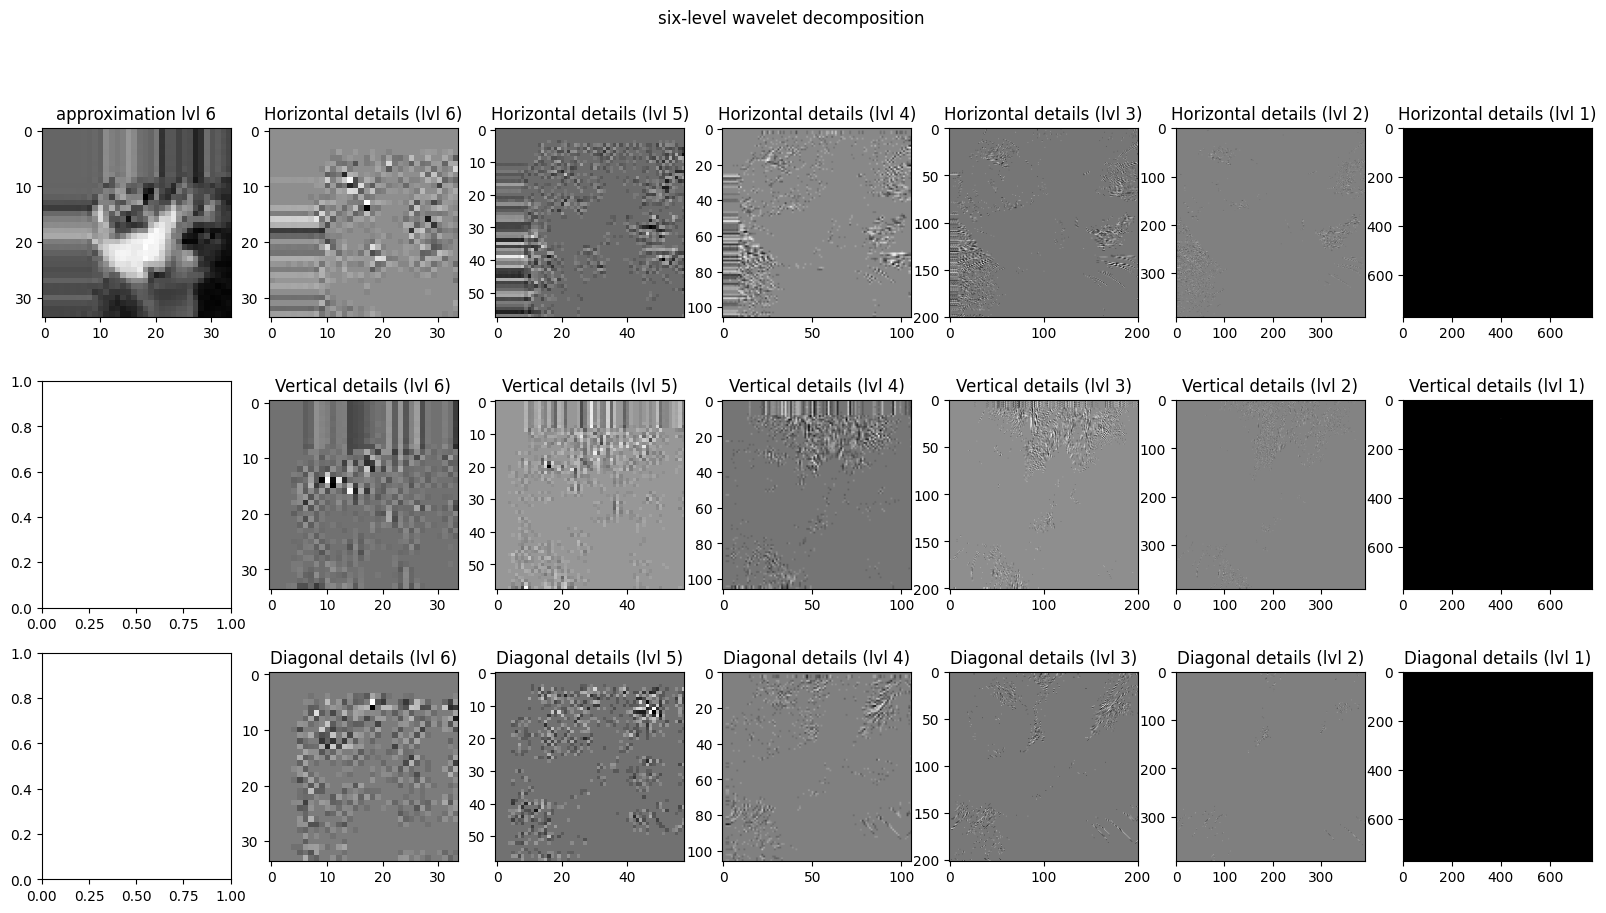

In [18]:
# Your code here
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)

wavelet='db6'
coeffs=pywt.wavedec2(input_image,wavelet,level=6)

fig, axes = plt.subplots(3,7,figsize=(20,10))
fig.suptitle('six-level wavelet decomposition')

axes[0,0].imshow(coeffs[0],cmap='gray')
axes[0,0].set_title('approximation lvl 6')

threshold=100

#application of the treshold
for i in range(1,7):
    cH,cV,cD=coeffs[i]   
    cH = np.where(np.abs(cH) < threshold, 0, cH)
    cV = np.where(np.abs(cV) < threshold, 0, cV)
    cD = np.where(np.abs(cD) < threshold, 0, cD)
    coeffs[i]=cH,cV,cD

for i in range(1,7):
    cH,cV,cD=coeffs[i]     
    axes[0,i].imshow(cH, cmap='gray')
    axes[0,i].set_title(f'Horizontal details (lvl {7-i})')
    axes[1,i].imshow(cV, cmap='gray')
    axes[1,i].set_title(f'Vertical details (lvl {7-i})')
    axes[2,i].imshow(cD, cmap='gray')
    axes[2,i].set_title(f'Diagonal details (lvl {7-i})')

plt.show()
    

* Compute the IDWT to reconstruct the image after the "compression". Check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2 as a reference.

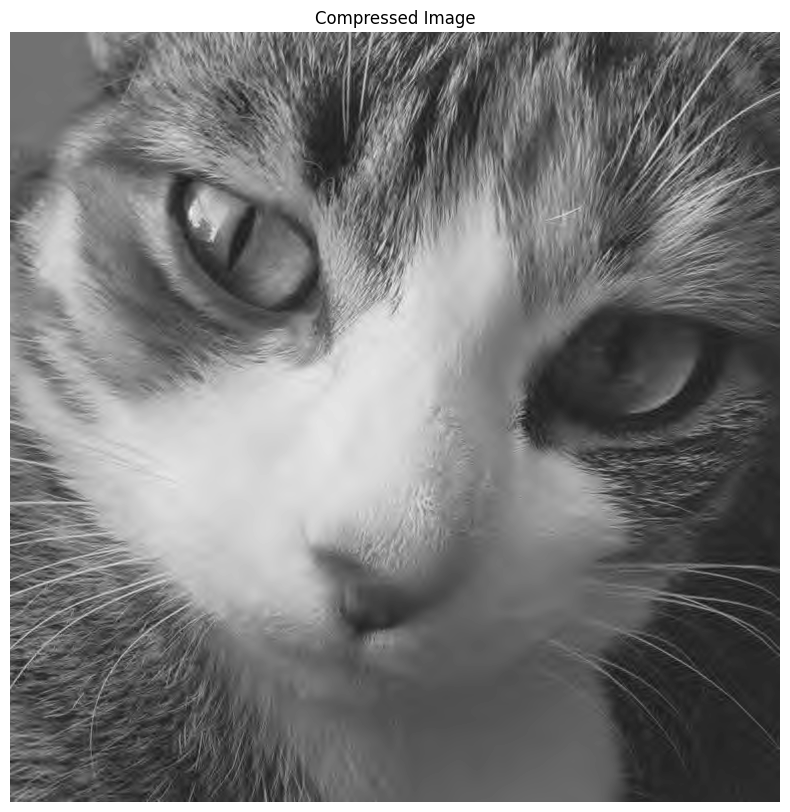

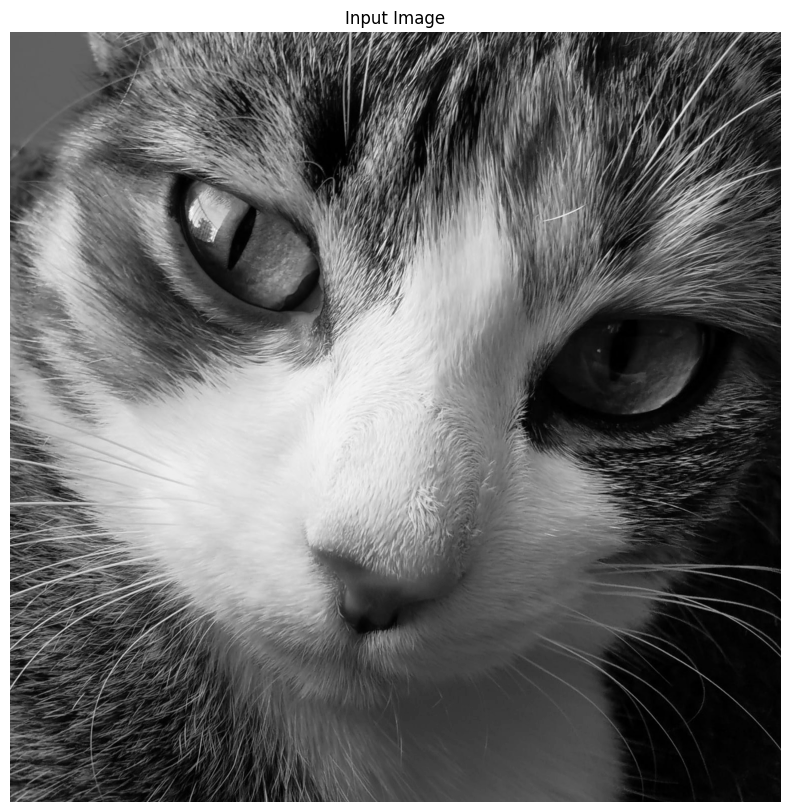

In [19]:
# Your code here
compressed_image=pywt.waverec2(coeffs,wavelet)

#plot compressed image
show_image(compressed_image, 'Compressed Image')

show_image(input_image, 'Input Image') #to compare

What's the compression ratio?

In [20]:
# Your code here
import os

cv2.imwrite('input_image.jpeg', input_image)
cv2.imwrite('compressed_Trudy.jpeg', compressed_image)

original_size= os.path.getsize('input_image.jpeg')
compressed_size= os.path.getsize('compressed_Trudy.jpeg')

os.remove('input_image.jpeg')
os.remove('compressed_Trudy.jpeg')

#I use an other save of Trudy so we have the same way of a saving (cv2.imwrite) for both the original image and compressed one

print(f'compression ratio is {original_size}/{compressed_size}={original_size/compressed_size}')

compression ratio is 694826/461481=1.5056437859846885


We obtain a compression ratio of 1.5 which is satisfying

# **Putting everything together**

In this exercise we'll analyze the Peak Signal to Noise Ration (PSNR) of the compressed images for different thresholds. For doing so, we'll give you the function to compute the PSNR between the original and compressed image.

In [21]:
def psnr(original_image, compressed_image):
    h,w = original_image.shape
    compressed_image_resized = cv2.resize(compressed_image, (original_image.shape[1], original_image.shape[0])) #it is weird but the original image of Trudy is not square so we ajust by resizing
    mse = np.sum(np.abs(original_image-compressed_image_resized)**2)/(h*w)
    return 20* np.log10(255**2/mse)

Now, you have to create a function codec that receives the input image, the wavelet to be used, the number of levels, and the threshold value. This function returns the compressed image and the compression ratio. **Note:** You already did that previously.

In [22]:
def codec(input_image,wavelet='db4',num_levels=6,threshold=100):
      # Your code here
     coeffs=pywt.wavedec2(input_image,wavelet,level=num_levels)

     for i in range(num_levels):
          cH,cV,cD=coeffs[i+1]   
          cH = np.where(np.abs(cH) < threshold, 0, cH)
          cV = np.where(np.abs(cV) < threshold, 0, cV)
          cD = np.where(np.abs(cD) < threshold, 0, cD)
          coeffs[i+1]=cH,cV,cD
     
     compressed_image=pywt.waverec2(coeffs,wavelet)

     cv2.imwrite('input_image.jpeg', input_image)
     cv2.imwrite('image_comprimee.jpeg', compressed_image)
     
     taille_initial = os.path.getsize('input_image.jpeg') 
     taille_comprimee = os.path.getsize('image_comprimee.jpeg') 

     os.remove('input_image.jpeg')
     os.remove('image_comprimee.jpeg')

     ratio=taille_initial/taille_comprimee
     return compressed_image,ratio

Now, we compare the performance of the 'db4' and the 'bior1.3' wavelets in terms of compression ratio and PSNR for different thresholds.

In [23]:
wavelet_1 = 'db4'
wavelet_2 = 'bior1.3'
thresholds = [5,10,20,40,80,100]
num_levels=6
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)
print(input_image.shape)


for threshold in thresholds:
    result1=codec(input_image,wavelet_1,num_levels,threshold)
    result2=codec(input_image,wavelet_2,num_levels,threshold)
    psnr1=psnr(input_image,result1[0])
    psnr2=psnr(input_image,result2[0])
    ratio1=result1[1]
    ratio2=result2[1]

    if ratio1<ratio2:
        print(f'bior1.3 has a better compression ratio for a threshold of {threshold}')
    else:
        print(f'db4 has a better compression ratio for a threshold of {threshold}')
    if psnr1<psnr2:
        print(f'bior1.3 has a better PSNR for a threshold of {threshold}')
    else:
        print(f'db4 has a better PSNR for a threshold of {threshold}')

(1531, 1532)
db4 has a better compression ratio for a threshold of 5
db4 has a better PSNR for a threshold of 5
db4 has a better compression ratio for a threshold of 10
db4 has a better PSNR for a threshold of 10
db4 has a better compression ratio for a threshold of 20
db4 has a better PSNR for a threshold of 20
db4 has a better compression ratio for a threshold of 40
db4 has a better PSNR for a threshold of 40
db4 has a better compression ratio for a threshold of 80
db4 has a better PSNR for a threshold of 80
db4 has a better compression ratio for a threshold of 100
db4 has a better PSNR for a threshold of 100


**QUESTIONS**

1) Which wavelet is better for the Trudy_for_compression.jpeg image and why?

the wavelet db4 wavelet performs better than bior1.3 in terms of PSNR (image quality) and compression ratio (compression quality) for every thresholds with Trudy_for_compression, thus db4 is definitly better.

# Supplementary Exercises (Optional)
1. Designing and using custom filters with the pyWavelets library
Reference (https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-families)
2. Propose and explore custom wavelets that achieve equivalent or higher compression ratio on the Trudy image explored previously. **P.S** You are free to explore any approach here.

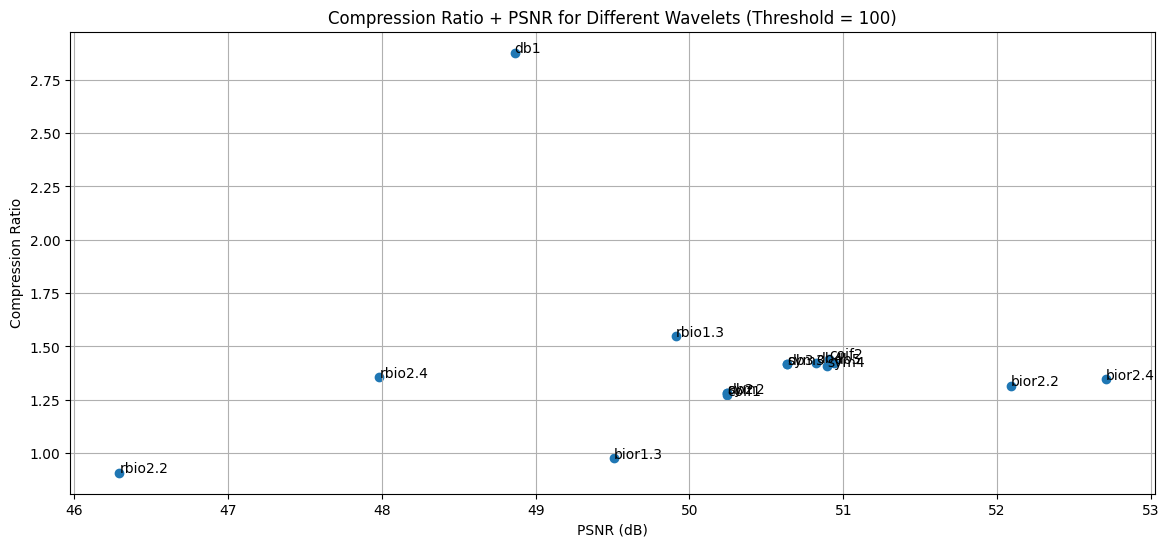

In [24]:
threshold = 100
num_levels = 6

#List of common wavelets
common_wavelets = ['db1', 'db2', 'db3', 'db4', 'db5', 'sym2', 'sym3', 'sym4', 'coif1', 'coif2', 'bior1.3', 'bior2.2', 'bior2.4', 'rbio1.3', 'rbio2.2', 'rbio2.4']


psnr_values = []
compression_ratios = []

for wavelet in common_wavelets:
    try:
        compressed_image, ratio = codec(input_image, wavelet, threshold=threshold, num_levels=num_levels)
        psnr_value = psnr(input_image, compressed_image)
        psnr_values.append(psnr_value)
        compression_ratios.append(ratio)
    except Exception as e:
        print(f"Error with wavelet {wavelet}: {e}")
        psnr_values.append(np.nan)
        compression_ratios.append(np.nan)

# Plot Compression Ratio vs PSNR
plt.figure(figsize=(14, 6))
plt.scatter(psnr_values, compression_ratios, marker='o')

for i, wavelet in enumerate(common_wavelets):
    plt.annotate(wavelet, (psnr_values[i], compression_ratios[i]))

plt.xlabel('PSNR (dB)')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio + PSNR for Different Wavelets (Threshold = 100)')
plt.grid(True)
plt.show()

We can conclude that b2.4 seems the most versatile with a much better PSNR than most other wavelets. However, db1 has by far the best compression ratio, but the quality loss is too great to use it on Trudy's image.